In [1]:
import numpy as np#importing packages
import numpy.random as random
import matplotlib.pyplot as plt

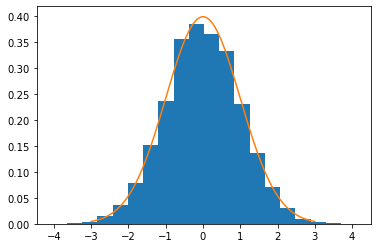

In [13]:
def normal_dt(x,mu,sigma):#generating normal distribution
    numerator = np.exp((-(x-mu)**2)/(2*sigma**2))
    denominator = sigma * np.sqrt(2*np.pi)
    return numerator/denominator

def random_coin(p):#generating uniform random value with condition
    unif = random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True
    
def gauss_mcmc(hops,mu,sigma):
    states = []
    burn_in = int(hops*0.2)
    current = random.uniform(-5*sigma+mu,5*sigma+mu)#current value updation
    for i in range(hops):
        states.append(current)
        movement = random.uniform(-5*sigma+mu,5*sigma+mu)#movement value updation
        
        curr_prob = normal_dt(x=current,mu=mu,sigma=sigma)
        move_prob = normal_dt(x=movement,mu=mu,sigma=sigma)#computing their probablities
        
        acceptance = min(move_prob/curr_prob,1)#defining the acceptance condition
        if random_coin(acceptance):#checking the condition
            current = movement#if yes add the value
    return states[burn_in:]
    
lines = np.linspace(-3,3,1000)
normal_curve = [normal_dt(l,mu=0,sigma=1) for l in lines]
dist = gauss_mcmc(100_000,mu=0,sigma=1)
plt.hist(dist,density = True,bins=20) 
plt.plot(lines,normal_curve)#plotting the curve